In [1]:
import numpy as np
import pandas as pd

#import ipympl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

print(matplotlib.get_backend())


#from sklearn.decomposition import PCA
#from PCA import PCA
import linear_model as LR
import log_model as logm
import softmax_logit as sml
import flda
import perceptron_model as pm
from sklearn import svm

%matplotlib inline
# %matplotlib notebook
# %matplotlib widget
# %matplotlib agg

module://ipykernel.pylab.backend_inline


In [2]:
data_dir = 'railwayBookingList.csv'
df = pd.read_csv(data_dir)

In [3]:
(df.isnull()).sum()

caseID            0
boarded           0
budget            0
memberCount       0
preferredClass    0
sex               1
age               0
dtype: int64

In [4]:
df.head()

,caseID,boarded,budget,memberCount,preferredClass,sex,age
0,111131089,0,2201,0,FIRST_AC,female,2
1,2489059216,0,1775,3,FIRST_AC,male,0
2,1565109576,1,1775,3,FIRST_AC,female,0
3,1373075087,1,1775,3,FIRST_AC,male,3
4,1598041082,1,1775,3,FIRST_AC,female,2


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Approved examples =  810
Non approved examples =  500
Proportion of positive to negative examples =  162.0


Text(0.5,1,'Class counts')

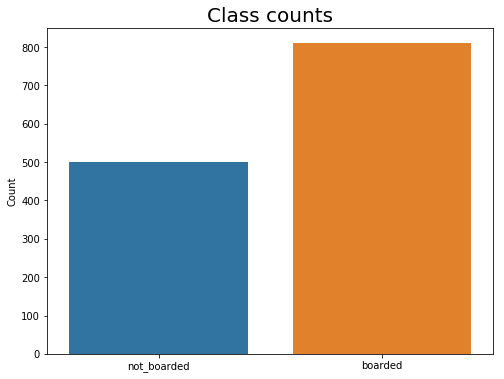

In [6]:
# Get number of positve and negative examples
pos = df[df["boarded"] == 1].shape[0]        # approved
neg = df[df["boarded"] == 0].shape[0]        # not approved     
print("Approved examples = ", pos)
print("Non approved examples = ", neg)
print("Proportion of positive to negative examples = ",(pos / neg) * 100)
plt.figure(figsize=(8, 6))
sns.countplot(df["boarded"])
plt.xticks((0, 1), ["not_boarded", "boarded"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20})

In [7]:
df1 = pd.get_dummies(df, columns=["preferredClass"], drop_first=False)

In [8]:
df1.head()

,caseID,boarded,budget,memberCount,sex,age,preferredClass_FIRST_AC,preferredClass_NO_PREF,preferredClass_SECOND_AC,preferredClass_THIRD_AC
0,111131089,0,2201,0,female,2,1,0,0,0
1,2489059216,0,1775,3,male,0,1,0,0,0
2,1565109576,1,1775,3,female,0,1,0,0,0
3,1373075087,1,1775,3,male,3,1,0,0,0
4,1598041082,1,1775,3,female,2,1,0,0,0


In [9]:
df1 = df1.drop(columns=['preferredClass_NO_PREF'])

In [10]:
df1 = pd.get_dummies(df1, columns=["sex"], drop_first=True)

In [11]:
df[df.sex.isnull()]

,caseID,boarded,budget,memberCount,preferredClass,sex,age
1309,3068255754,1,710,0,NO_PREF,NaN,0


In [12]:
df1.head()

,caseID,boarded,budget,memberCount,age,preferredClass_FIRST_AC,preferredClass_SECOND_AC,preferredClass_THIRD_AC,sex_male
0,111131089,0,2201,0,2,1,0,0,0
1,2489059216,0,1775,3,0,1,0,0,1
2,1565109576,1,1775,3,0,1,0,0,0
3,1373075087,1,1775,3,3,1,0,0,1
4,1598041082,1,1775,3,2,1,0,0,0


In [13]:
X = df1[['budget', 'memberCount',  'age','preferredClass_FIRST_AC','preferredClass_SECOND_AC','preferredClass_THIRD_AC','sex_male']].values

In [14]:
y = df[['boarded']].values

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Flda testing

In [16]:
from flda import flda
model = flda(num_classes=2)

In [17]:
model.train(X_train,y_train)
y_train_pred=model.predict(X_train)

In [18]:
from sklearn import metrics
print('Training set accuracy using flda:',metrics.accuracy_score(y_train, y_train_pred))
print('Training set f1 score using flda:',metrics.f1_score(y_train, y_train_pred))

Training set accuracy using flda: 0.37595419847328243
Training set f1 score using flda: 0.018018018018018018


In [19]:
y_train.sum()

660

In [20]:
y_test_pred = model.predict(X_test)
print('Test set accuracy using flda:',metrics.accuracy_score(y_test, y_test_pred))
print('Test set f1 score using flda:',metrics.f1_score(y_test, y_test_pred))


Test set accuracy using flda: 0.44274809160305345
Test set f1 score using flda: 0.05194805194805195


In [21]:
import performance_util as pu

In [22]:

Y_pred = model.predict(X_test)
print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, y_test, 2).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, y_test, 2).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, y_test, 2).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, y_test, 2))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, y_test, 2))

Accuracy on Dev Set =  0.44274809160305345
Precision per Class
[0.43410853 1.        ]
Recall per Class
[1.         0.02666667]
F1 Score per Class
[0.60540541 0.05194805]
Macro Average Precision, Recall and F1 Score
[0.71705426 0.51333333 0.59832829]
Micro Average Precision, Recall and F1 Score
[0.44274809 0.44274809 0.44274809]


# Standard Scaling

In [23]:
X_train_df = pd.DataFrame(X_train,columns = ['budget', 'memberCount',  'age','preferredClass_FIRST_AC','preferredClass_SECOND_AC','preferredClass_THIRD_AC','sex_male'])

In [24]:
X_test_df = pd.DataFrame(X_test,columns =['budget', 'memberCount',  'age','preferredClass_FIRST_AC','preferredClass_SECOND_AC','preferredClass_THIRD_AC','sex_male'])

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

/home/harsh/.conda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
X_test_scaled


array([[-0.53319188, -0.55339725, -0.64509198, ..., -0.52138725,
         0.93350339,  0.75422959],
       [-0.53319188, -0.55339725, -1.2381239 , ..., -0.52138725,
         0.93350339,  0.75422959],
       [ 0.04486166,  0.55763784, -0.64509198, ...,  1.91796023,
        -1.07123339, -1.32585623],
       ...,
       [ 0.6229152 ,  0.0021203 , -0.05206005, ..., -0.52138725,
        -1.07123339,  0.75422959],
       [-0.53319188, -0.55339725, -0.64509198, ..., -0.52138725,
         0.93350339,  0.75422959],
       [-0.53319188, -0.55339725, -1.2381239 , ..., -0.52138725,
         0.93350339,  0.75422959]])

## flda on scaled data

In [27]:

model1 = flda(num_classes=2)
model1.train(X_train_scaled,y_train)
y_train_pred=model.predict(X_train_scaled)
print('Training set accuracy using flda:',metrics.accuracy_score(y_train, y_train_pred))
print('Training set f1 score using flda:',metrics.f1_score(y_train, y_train_pred))
y_test_pred = model.predict(X_test_scaled)
print('Test set accuracy using flda:',metrics.accuracy_score(y_test, y_test_pred))
print('Test set f1 score using flda:',metrics.f1_score(y_test, y_test_pred))

Training set accuracy using flda: 0.7299618320610687
Training set f1 score using flda: 0.7631799163179916
Test set accuracy using flda: 0.7748091603053435
Test set f1 score using flda: 0.7915194346289753


# Perceptron model

In [28]:
model = pm.perceptron_model(1, 2, 1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Training set accuracy using percept:',metrics.accuracy_score(y_train, y_train_pred))
print('Training set f1 score using percept:',metrics.f1_score(y_train, y_train_pred))

print('Test set accuracy using perceptron:',metrics.accuracy_score(y_test, y_test_pred))
print('Test set f1 score using perceptron:',metrics.f1_score(y_test, y_test_pred))



Training set accuracy using percept: 0.6393129770992366
Training set f1 score using percept: 0.777122641509434
Test set accuracy using perceptron: 0.5763358778625954
Test set f1 score using perceptron: 0.7286063569682151


100
Training set accuracy using percept: 0.6393129770992366
Training set f1 score using percept: 0.777122641509434
Test set accuracy using perceptron: 0.5763358778625954
Test set f1 score using perceptron: 0.7286063569682151
600
Training set accuracy using percept: 0.6297709923664122
Training set f1 score using percept: 0.7728337236533958
Test set accuracy using perceptron: 0.5725190839694656
Test set f1 score using perceptron: 0.7281553398058253
1100
Training set accuracy using percept: 0.7767175572519084
Training set f1 score using percept: 0.8377253814147018
Test set accuracy using perceptron: 0.7442748091603053
Test set f1 score using perceptron: 0.8080229226361032
1600
Training set accuracy using percept: 0.7681297709923665
Training set f1 score using percept: 0.840655737704918
Test set accuracy using perceptron: 0.7137404580152672
Test set f1 score using perceptron: 0.7945205479452055
2100
Training set accuracy using percept: 0.7862595419847328
Training set f1 score using percept

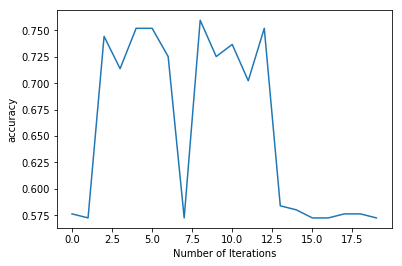

In [36]:
accuracy = []
best_acc = 0
best_iter = 0
for i in range(100, 10000, 500):
    print (i)
    model = pm.perceptron_model(i, 2, 1)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred=model.predict(X_train)
    accuracy.append(pu.model_accuracy(y_test_pred, y_test))
    if(pu.model_accuracy(y_test_pred, y_test) > best_acc):
        best_acc = pu.model_accuracy(y_test_pred, y_test)
        best_iter = i
        
    print('Training set accuracy using percept:',metrics.accuracy_score(y_train, y_train_pred))
    print('Training set f1 score using percept:',metrics.f1_score(y_train, y_train_pred))

    print('Test set accuracy using perceptron:',metrics.accuracy_score(y_test, y_test_pred))
    print('Test set f1 score using perceptron:',metrics.f1_score(y_test, y_test_pred))


plt.figure()
plt.plot(np.arange(len(accuracy)), accuracy)
plt.xlabel("Number of Iterations")
plt.ylabel("accuracy")
plt.savefig("perceptron_accuracy.png")

## perceptron om sclaed data

In [ ]:
model = pm.perceptron_model(1, 2, 1)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print('Training set accuracy using percept:',metrics.accuracy_score(y_train, y_train_pred))
print('Training set f1 score using percept:',metrics.f1_score(y_train, y_train_pred))

print('Test set accuracy using perceptron:',metrics.accuracy_score(y_test, y_test_pred))
print('Test set f1 score using perceptron:',metrics.f1_score(y_test, y_test_pred))

# svm 

In [30]:
#kernels = ['linear', 'rbf', 'poly', 'sigmoid']
kernels = ['linear', 'rbf']
for ker in kernels:
    model = svm.SVC(kernel = ker)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(ker)
    print('Training set accuracy using '+ker,metrics.accuracy_score(y_train, y_train_pred))
    print('Training set f1 score using '+ker,metrics.f1_score(y_train, y_train_pred))

    print('Test set accuracy using '+ ker,metrics.accuracy_score(y_test, y_test_pred))
    print('Test set f1 score using '+ker,metrics.f1_score(y_test, y_test_pred))


/home/harsh/.conda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


linear
Training set accuracy using linear 0.7843511450381679
Training set f1 score using linear 0.8308383233532934
Test set accuracy using linear 0.7595419847328244
Test set f1 score using linear 0.8012618296529969
rbf
Training set accuracy using rbf 0.8215648854961832
Training set f1 score using rbf 0.8628026412325753
Test set accuracy using rbf 0.7557251908396947
Test set f1 score using rbf 0.8036809815950918


# svm on scaled data

# softmax logistic regression

In [30]:
from matplotlib import pyplot as plt

/home/harsh/Desktop/ell_assmt/ell_Assin_2/softmax_logit.py:54: RuntimeWarning: invalid value encountered in true_divide
  sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T


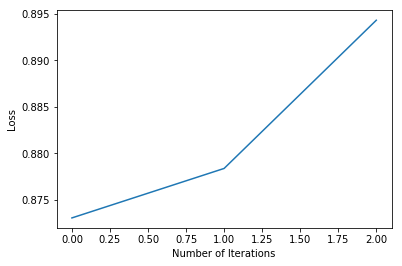

Training set accuracy using sm: 0.3702290076335878
Training set f1 score using sm: 0.0
Test set accuracy using sm: 0.42748091603053434
Test set f1 score using sm: 0.0


/home/harsh/.conda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
model = sml.softmaxLogit()
model.train(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Training set accuracy using sm:',metrics.accuracy_score(y_train, y_train_pred))
print('Training set f1 score using sm:',metrics.f1_score(y_train, y_train_pred))

print('Test set accuracy using sm:',metrics.accuracy_score(y_test, y_test_pred))
print('Test set f1 score using sm:',metrics.f1_score(y_test, y_test_pred))


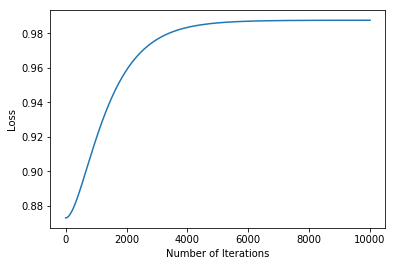

Training set accuracy using sm: 0.3702290076335878
Training set f1 score using sm: 0.0
Test set accuracy using sm: 0.42748091603053434
Test set f1 score using sm: 0.0


/home/harsh/.conda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
model = sml.softmaxLogit()
model.train(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print('Training set accuracy using sm:',metrics.accuracy_score(y_train, y_train_pred))
print('Training set f1 score using sm:',metrics.f1_score(y_train, y_train_pred))

print('Test set accuracy using sm:',metrics.accuracy_score(y_test, y_test_pred))
print('Test set f1 score using sm:',metrics.f1_score(y_test, y_test_pred))


In [33]:
y_train_pred.shape

(1048,)

/home/harsh/Desktop/ell_assmt/ell_Assin_2/log_model.py:29: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
/home/harsh/Desktop/ell_assmt/ell_Assin_2/log_model.py:29: RuntimeWarning: invalid value encountered in multiply
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


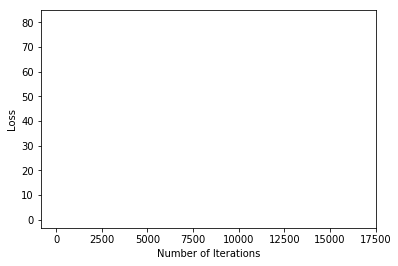

Training set accuracy using sm: 0.6297709923664122
Training set f1 score using sm: 0.7728337236533958
Test set accuracy using sm: 0.5725190839694656
Test set f1 score using sm: 0.7281553398058253


In [34]:
model = logm.LogitModel()
model.train(X_train, y_train.ravel())
y_train_pred = model.predict(X_train,0.5)
y_test_pred = model.predict(X_test,0.5)

print('Training set accuracy using sm:',metrics.accuracy_score(y_train, y_train_pred))
print('Training set f1 score using sm:',metrics.f1_score(y_train, y_train_pred))

print('Test set accuracy using sm:',metrics.accuracy_score(y_test, y_test_pred))
print('Test set f1 score using sm:',metrics.f1_score(y_test, y_test_pred))

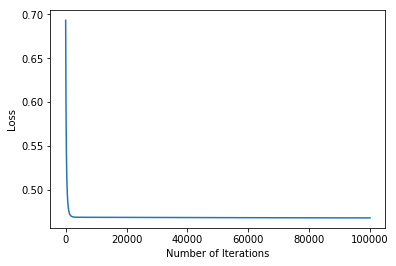

Training set accuracy using sm: 0.7929389312977099
Training set f1 score using sm: 0.8403237674760853
Test set accuracy using sm: 0.7862595419847328
Test set f1 score using sm: 0.8271604938271604


In [35]:
model = logm.LogitModel()
model.train(X_train_scaled, y_train.ravel())
y_train_pred = model.predict(X_train_scaled,0.5)
y_test_pred = model.predict(X_test_scaled,0.5)

print('Training set accuracy using sm:',metrics.accuracy_score(y_train, y_train_pred))
print('Training set f1 score using sm:',metrics.f1_score(y_train, y_train_pred))

print('Test set accuracy using sm:',metrics.accuracy_score(y_test, y_test_pred))
print('Test set f1 score using sm:',metrics.f1_score(y_test, y_test_pred))

In [ ]:
X_train.shape

In [ ]:
y_train.shape

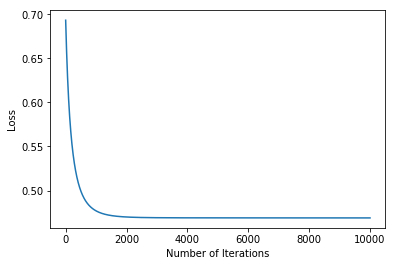

Training set accuracy using sm: 0.7929389312977099
Training set f1 score using sm: 0.8403237674760853
Test set accuracy using sm: 0.7862595419847328
Test set f1 score using sm: 0.8271604938271604


In [37]:
model = logm.LogitModel(Lambda=1,num_iter = 10000)
model.train(X_train_scaled, y_train.ravel())
y_train_pred = model.predict(X_train_scaled,0.5)
y_test_pred = model.predict(X_test_scaled,0.5)

print('Training set accuracy using sm:',metrics.accuracy_score(y_train, y_train_pred))
print('Training set f1 score using sm:',metrics.f1_score(y_train, y_train_pred))

print('Test set accuracy using sm:',metrics.accuracy_score(y_test, y_test_pred))
print('Test set f1 score using sm:',metrics.f1_score(y_test, y_test_pred))

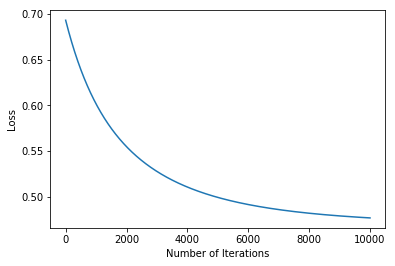

Training set accuracy using sm: 0.7833969465648855
Training set f1 score using sm: 0.8297074268567143
Test set accuracy using sm: 0.7709923664122137
Test set f1 score using sm: 0.8113207547169812


In [41]:
model = logm.LogitModel(Lambda=0,num_iter = 10001, alpha = 0.001)
model.train(X_train_scaled, y_train.ravel())
y_train_pred = model.predict(X_train_scaled,0.5)
y_test_pred = model.predict(X_test_scaled,0.5)

print('Training set accuracy using sm:',metrics.accuracy_score(y_train, y_train_pred))
print('Training set f1 score using sm:',metrics.f1_score(y_train, y_train_pred))

print('Test set accuracy using sm:',metrics.accuracy_score(y_test, y_test_pred))
print('Test set f1 score using sm:',metrics.f1_score(y_test, y_test_pred))